# Dandiset 001335: Neuropixels Recordings Exploration

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Users should be cautious when interpreting the code or results.

## Introduction
Dandiset 001335 includes Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation.
- **Contributors**: Manish Mohapatra, Yaroslav Halchenko
- **Institution**: Dartmouth College
- **License**: CC-BY-4.0
- **Description**: Wild type mice were presented with various odor sequences, while neural activity was recorded from the hippocampus using Neuropixels probes.
- **Version**: Draft
- **Reference**: [Neuropixels Recordings Dataset](https://dandiarchive.org/dandiset/001335/draft)

# %% [markdown]
## Loading Dandiset and Assets
Below is an example of how to list all assets in the Dandiset using the DANDI API.

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

# Access specific NWB files for further exploration
nwb_file_url = "https://lindi.neurosift.org/dandi/dandisets/001335/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/nwb.lindi.json"

## Visualizing Local Field Potential (LFP) Data Sample
LFP data is an essential component of examining neural recordings. LFP is recorded from electrodes placed in the brain region of interest.

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


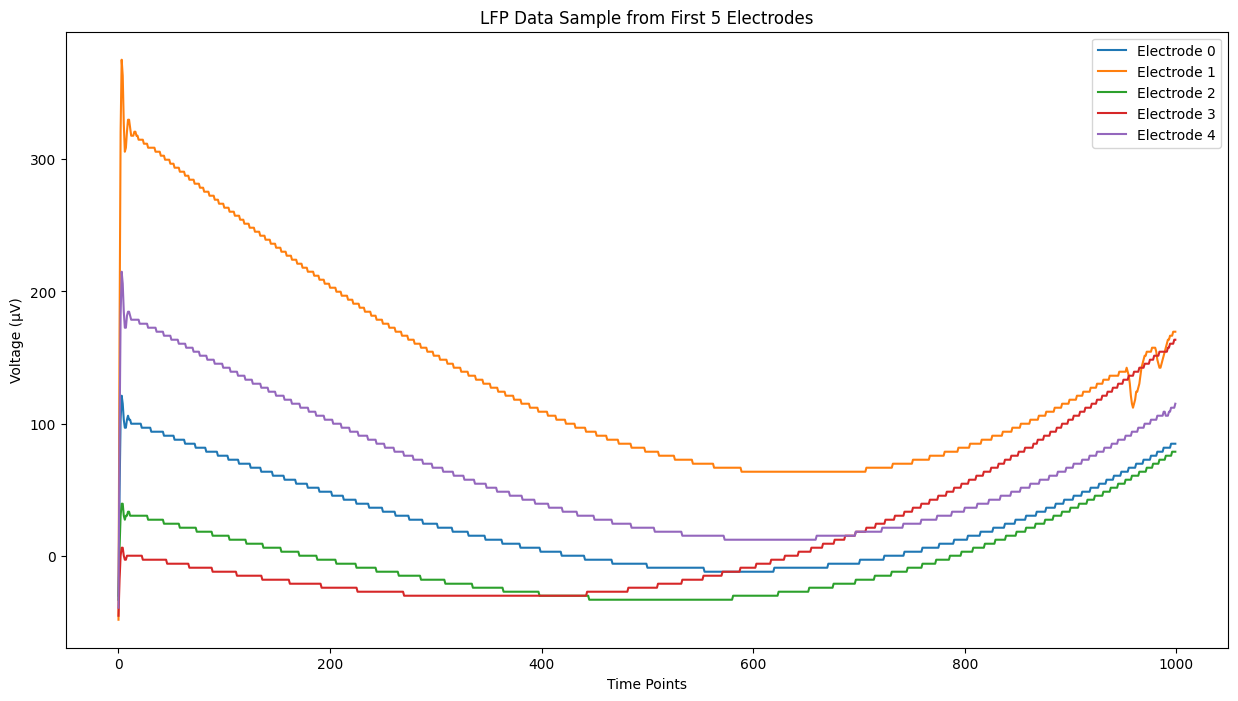

In [2]:
import lindi
import pynwb
import matplotlib.pyplot as plt

# Load NWB file
f = lindi.LindiH5pyFile.from_lindi_file(nwb_file_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Access and subset LFP data
lfp = nwb.processing["ecephys"]["LFP"]
electrodes = lfp.electrodes["id"].data[:]
data_sample = lfp.data[:1000, :5]

# Plot LFP data
plt.figure(figsize=(15, 8))
for i in range(data_sample.shape[1]):
    plt.plot(data_sample[:, i], label=f'Electrode {electrodes[i]}')

plt.xlabel('Time Points')
plt.ylabel('Voltage (µV)')
plt.title('LFP Data Sample from First 5 Electrodes')
plt.legend()
plt.show()

### Analysis and Observations
The plot above displays the LFP data for the first five electrodes over 1000 time points.
- **Overall Pattern:** A general decline in voltage followed by an increase across electrodes.
- **Variability:** Electrode 1 shows the most variability in recorded voltage.
- **Synchronized Activity:** Display of synchronized but variably scaled signals.